In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn

# Import CIFAR10 dataset

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True, num_workers=4)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False, num_workers=4)

#Class labels

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


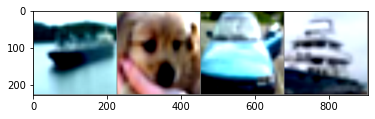

 Ship   Dog   Car  Ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Transfer Learning from ImageNet

In [18]:
trainedModel = models.alexnet(pretrained=True)
untrainedModel = models.alexnet(pretrained=False)

# trainedModel.classifier[4] = nn.Linear(4096,1024)
# trainedModel.classifier[6] = nn.Linear(1024,10)

# trainedModel.classifier[6] = nn.linear(4096, 10)

# untrainedModel.classifier[4] = nn.Linear(4096,1024)
# untrainedModel.classifier[6] = nn.Linear(1024,10)

# untrainedModel.classifier[6] = nn.linear(4096, 10)



untrainedModel.classifier = nn.Sequential(*list(untrainedModel.classifier) + [nn.Linear(1000, 10)])
untrainedModel.eval()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
untrainedModel.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(untrainedModel.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
  current_loss = 0.0
  correct = 0
  tot = 0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    output = untrainedModel(inputs)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    prediction = torch.max(output.data, 1)    
    # print("pred ", prediction.indices, " labels ", labels)
    current_loss += loss.item()
    for pred, label in zip(prediction.indices, labels):
      tot += 1
      if (pred == label):
        correct += 1 
    if i % 100 == 99:
        print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, current_loss / 100))
        current_loss = 0
        print("Accuracy: ", correct/tot)
print('Finished Training')

[1,   100] loss: 2.303
Accuracy:  0.0975
[1,   200] loss: 2.302
Accuracy:  0.0996
[1,   300] loss: 2.302
Accuracy:  0.10896666666666667
[1,   400] loss: 2.301
Accuracy:  0.117925
[1,   500] loss: 2.301
Accuracy:  0.12526
[2,   100] loss: 2.300
Accuracy:  0.1544
[2,   200] loss: 2.298
Accuracy:  0.15965
[2,   300] loss: 2.293
Accuracy:  0.1513
[2,   400] loss: 2.274
Accuracy:  0.1482
[2,   500] loss: 2.206
Accuracy:  0.15682
[3,   100] loss: 2.089
Accuracy:  0.2458
[3,   200] loss: 2.010
Accuracy:  0.25495
[3,   300] loss: 1.964
Accuracy:  0.2663
[3,   400] loss: 1.898
Accuracy:  0.277175
[3,   500] loss: 1.849
Accuracy:  0.28762
[4,   100] loss: 1.796
Accuracy:  0.3522
[4,   200] loss: 1.732
Accuracy:  0.36715
[4,   300] loss: 1.687
Accuracy:  0.3747
[4,   400] loss: 1.660
Accuracy:  0.379925
[4,   500] loss: 1.616
Accuracy:  0.38682
[5,   100] loss: 1.571
Accuracy:  0.4351
[5,   200] loss: 1.587
Accuracy:  0.4284
[5,   300] loss: 1.548
Accuracy:  0.4347
[5,   400] loss: 1.533
Accuracy

In [19]:
for param in trainedModel.parameters():
    param.requires_grad = False
trainedModel.classifier = nn.Sequential(*list(trainedModel.classifier) + [nn.Linear(1000, 10)])
trainedModel.eval()
trainedModel.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [20]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(trainedModel.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
  current_loss = 0.0
  correct = 0
  tot = 0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    output = trainedModel(inputs)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    prediction = torch.max(output.data, 1)    
    # print("pred ", prediction.indices, " labels ", labels)
    current_loss += loss.item()
    for pred, label in zip(prediction.indices, labels):
      tot += 1
      if (pred == label):
        correct += 1 
    if i % 100 == 99:
        print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, current_loss / 100))
        current_loss = 0
        print("Accuracy: ", correct/tot)
print('Finished Training')

[1,   100] loss: 1.110
Accuracy:  0.6155
[1,   200] loss: 0.780
Accuracy:  0.6693
[1,   300] loss: 0.752
Accuracy:  0.6895666666666667
[1,   400] loss: 0.727
Accuracy:  0.703375
[1,   500] loss: 0.700
Accuracy:  0.71334
[2,   100] loss: 0.678
Accuracy:  0.7589
[2,   200] loss: 0.649
Accuracy:  0.76445
[2,   300] loss: 0.678
Accuracy:  0.7631666666666667
[2,   400] loss: 0.659
Accuracy:  0.765625
[2,   500] loss: 0.641
Accuracy:  0.76784
[3,   100] loss: 0.636
Accuracy:  0.7784
[3,   200] loss: 0.627
Accuracy:  0.77775
[3,   300] loss: 0.624
Accuracy:  0.7773
[3,   400] loss: 0.638
Accuracy:  0.777425
[3,   500] loss: 0.624
Accuracy:  0.77766
[4,   100] loss: 0.601
Accuracy:  0.7886
[4,   200] loss: 0.608
Accuracy:  0.7863
[4,   300] loss: 0.623
Accuracy:  0.7849
[4,   400] loss: 0.607
Accuracy:  0.784925
[4,   500] loss: 0.579
Accuracy:  0.7867
[5,   100] loss: 0.602
Accuracy:  0.7936
[5,   200] loss: 0.576
Accuracy:  0.7962
[5,   300] loss: 0.610
Accuracy:  0.7931
[5,   400] loss: 0.5

In [41]:
current_loss = 0.0
correct = 0
tot = 0
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        output = untrainedModel(inputs)
        prediction = torch.max(output.data, 1)
        current_loss += loss.item()
        for pred, label in zip(prediction.indices, labels):
            tot += 1
            if (pred == label):
                correct += 1 
    print('Test accuracy: ', (100*correct/tot), '%')

Test accuracy:  61.19 %


In [42]:
current_loss = 0.0
correct = 0
tot = 0
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        output = trainedModel(inputs)
        prediction = torch.max(output.data, 1)
        current_loss += loss.item()
        for pred, label in zip(prediction.indices, labels):
            tot += 1
            if (pred == label):
                correct += 1 
    print('Test accuracy: ', (100*correct/tot), '%')

Test accuracy:  78.56 %


# Transfer Learning from MNIST